In [5]:
import cv2
import numpy as np

SIFT Detector

In [6]:
sift = cv2.SIFT_create()

In [21]:
img_1 = cv2.imread("cat1.jpg")
img_2 = cv2.imread("cat2.jpg")

In [8]:
kp1, des1 = sift.detectAndCompute(img_1, None)
kp2, des2 = sift.detectAndCompute(img_2, None)

Find matches using k nearest neighbors

In [9]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [10]:
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [11]:
img3 = cv2.drawMatchesKnn(
    img_1, kp1, img_2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

In [12]:
cv2.imwrite("out.jpg", img3)

True

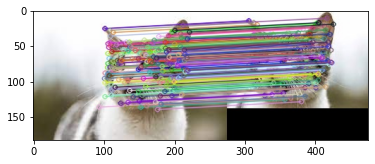

In [13]:
import matplotlib.pyplot as plt

img = cv2.imread("out.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

ORB

In [14]:
orb = cv2.ORB_create()

In [16]:
kp1, des1 = orb.detectAndCompute(img_1, None)
kp2, des2 = orb.detectAndCompute(img_2, None)

ORB is a binary descriptor, we find matches using Hamming Distance, which is a measure of the difference between two strings of equal length.

In [17]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [18]:
matches = bf.match(des1, des2)

In [19]:
matches = sorted(matches, key=lambda x: x.distance)

In [27]:
img3 = cv2.drawMatches(
    img_1,
    kp1,
    img_2,
    kp2,
    matches[:50],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

In [28]:
cv2.imwrite("out_orb.jpg", img3)

True

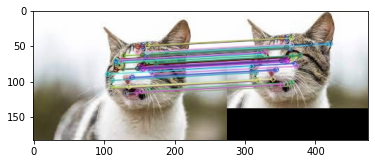

In [29]:
img = cv2.imread("out_orb.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()